# Part b) Hamiltonian Eigenvalue Problem

## Introduction

In quantum mechanics the hamiltonian is an operator that describes the total energy of a system. The eigenvalues of the hamiltonian correspond to the possible energy levels of the system, and the eigenstates correspond to the states of the system at those energy levels.

In this part of the project, we will study the symmetric 2×2 matrix Hamiltonian operator $H \in \mathbb{R}^{2\times 2}$ given by:

$$
H = \begin{bmatrix} H_{11} & H_{12} \\ H_{21} & H_{22}\end{bmatrix},
$$

that could represent a two state quantum system $\ket{0}$ and $\ket{1}$ 
A Hamiltonian operator in quantum mechanics is a Hermitian operator, which means that it is equal to its own adjoint. This implies that the matrix elements satisfy the following conditions:
$$
H_{ij} = H_{ji}^* \quad \text{for } i,j=1,2.
$$

We decompose $H = H_0 + H_I$, where $H_0$ is the non-interacting part:

$$
H_0= \begin{bmatrix} E_1 & 0 \\ 0 & E_2\end{bmatrix},
$$

And $H_I$ is the interaction part:

$$
H_I= \begin{bmatrix} V_{11} & V_{12} \\ V_{21} & V_{22}\end{bmatrix},
$$


We can rewrite $H_0$ and $H_I$ in terms of Pauli matrices:

$$
H_0 = \mathcal{E} I + \Omega \sigma_z, \quad \mathcal{E} = \frac{E_1 + E_2}{2}, \; \Omega = \frac{E_1-E_2}{2},
$$

where $\mathcal{E}$ is the average energy of the two states and $\Omega$ is the energy difference between the two states.

$$
H_I = c \boldsymbol{I} +\omega_z\sigma_z + \omega_x\sigma_x,
$$

with $c = (V_{11}+V_{22})/2$, $\omega_z = (V_{11}-V_{22})/2$ and $\omega_x = V_{12}=V_{21}$.

where $c$ is the overall energy shift, $\omega_z$ is the energy difference between the two states, and $\omega_x$ is the coupling strength between the two states. 

The full Hamiltonian depends linearly on a strength parameter $\lambda \in [0,1]$:

$$
H=H_0+\lambda H_\mathrm{I}
$$

Now we will solve this eigenvalue problem and analyze the behavior of the eigenvalues and eigenstates as a function of $\lambda$.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from quantum_computing.p1.hamiltonian.hamiltonian import Hamiltonian

## Define the Hamiltonian

For this problem, we have defined a class `Hamiltonian` that represents the Hamiltonian operator with methods to help us setup the complete hamiltonian in sequence. 
We start by defining our parameters and the Hamiltonian class.

In [2]:
ham = Hamiltonian()

E1 = 0  # Energy of state |0⟩
E2 = 4  # Energy of state |1⟩
V11 = 3  # Interaction element
V12 = 0.2  # Interaction element
V21 = V12  # Interaction element (V12 = V21 for symmetry)
V22 = -V11  # Interaction element

H0 = ham.create_H0(E1, E2)
HI = ham.create_HI(V11,V12,V21,V22)

print("H0 = ")
print(H0)
print("\nHI = ")
print(HI)

H0 = 
[[0.+0.j 0.+0.j]
 [0.+0.j 4.+0.j]]

HI = 
[[ 3. +0.j  0.2+0.j]
 [ 0.2+0.j -3. +0.j]]


The above results show the constructed $H_0$ and $H_I$ matrices with the parameter values. 

## Express in terms of Pauli matrices
We have for the `Hamiltonian` class defined a method to express the Hamiltonian in terms of Pauli matrices, given the decomposed Hamiltonians $H_0$ and $H_I$ by the parameter values.

Now let's express $H_0$ and $H_I$ in terms of Pauli matrices and verify our calculations:

In [8]:
# Express in terms of Pauli matrices
H0_coeffs, HI_coeffs = ham.express_in_pauli_basis(H0, HI)

print("H0 coefficients:")
print(f"E = {H0_coeffs['E']}, Omega = {H0_coeffs['Omega']}")

print("\nHI coefficients:")
print(f"c = {HI_coeffs['c']}, omega_z = {HI_coeffs['omega_z']}, omega_x = {HI_coeffs['omega_x']}")

lambda_val = 0.5
H_reconstructed = ham.reconstruct_from_pauli(H0_coeffs, HI_coeffs, lambda_val)
H_direct = ham.create_total_H(H0, HI, lambda_val)

print("\nVerify reconstruction:")
print("H with lambda = 0.5 (direct):")
print(H_direct)
print("\nH with lambda = 0.5 (reconstructed from Pauli terms):")
print(H_reconstructed)


H0 coefficients:
E = (2+0j), Omega = (-2+0j)

HI coefficients:
c = 0j, omega_z = (3+0j), omega_x = (0.2+0j)

Verify reconstruction:
H with lambda = 0.5 (direct):
[[1.5+0.j 0.1+0.j]
 [0.1+0.j 2.5+0.j]]

H with lambda = 0.5 (reconstructed from Pauli terms):
[[1.5+0.j 0.1+0.j]
 [0.1+0.j 2.5+0.j]]


We have now expressed the Hamiltonian in terms of Pauli matrices. with coefficients $\mathcal{E}$, $\Omega$, $c$, $\omega_z$ and $\omega_x$ and coefficients values:

$H_0$ coefficients:
$$\mathcal{E} = 2, \quad \Omega = -2$$

$H_I$ coefficients:

$$c = 0, \quad \omega_z = 3, \quad \omega_x = 0.2$$



## Solve the Eigenvalue Problem

Now let's solve the eigenvalue problem for various values of $\lambda$ and plot the results:

Maximum eigenvalue for ground state:
1.866667
Minimum eigenvalue for excited state:
2.133333
Minimum gap between ground and excited states:
0.266667


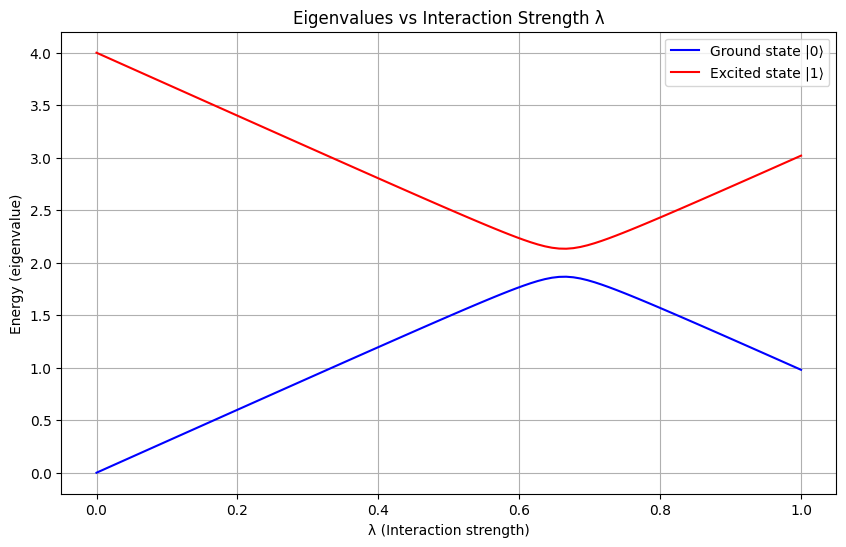

In [16]:
lambda_values = np.linspace(0, 1, 100)
eigenvalues_list, eigenvectors_list = ham.eigenvalues_vs_lambda(H0, HI, lambda_values)
eigenvalues_array = np.array(eigenvalues_list)

max0 = np.max(eigenvalues_array[:, 0])
print("Maximum eigenvalue for ground state:")
print(f"{max0:.6f}")

min1 = np.min(eigenvalues_array[:, 1])
print("Minimum eigenvalue for excited state:")
print(f"{min1:.6f}")

difference = min1 - max0
print("Minimum gap between ground and excited states:")
print(f"{difference:.6f}")


plt.figure(figsize=(10, 6))
plt.plot(lambda_values, eigenvalues_array[:, 0], 'b-', label='Ground state |0⟩')
plt.plot(lambda_values, eigenvalues_array[:, 1], 'r-', label='Excited state |1⟩')
plt.xlabel('λ (Interaction strength)')
plt.ylabel('Energy (eigenvalue)')
plt.title('Eigenvalues vs Interaction Strength λ')
plt.grid(True)
plt.legend()
plt.show()

The plot above shows the results of solving for eigenvalues for various values of $\lambda$ from 0 to 1.
The eigenvalues are plotted as a function of $\lambda$.
We se that for zero interaction $\lambda=0$ the eigenvalues are equal to the eigenvalues of $H_0$. Upon increasing $\lambda$ the eigenvalues start to deviate from the $H_0$ eigenvalues.

The energi gap between the two states decrease linearly with $\lambda$ until $\lambda=2/3$ where the gap is minimum with value of `0.266667` and then starts to increase again until $\lambda=1$ where the gap becomes `2`.

A plot of the energi gap is given below:

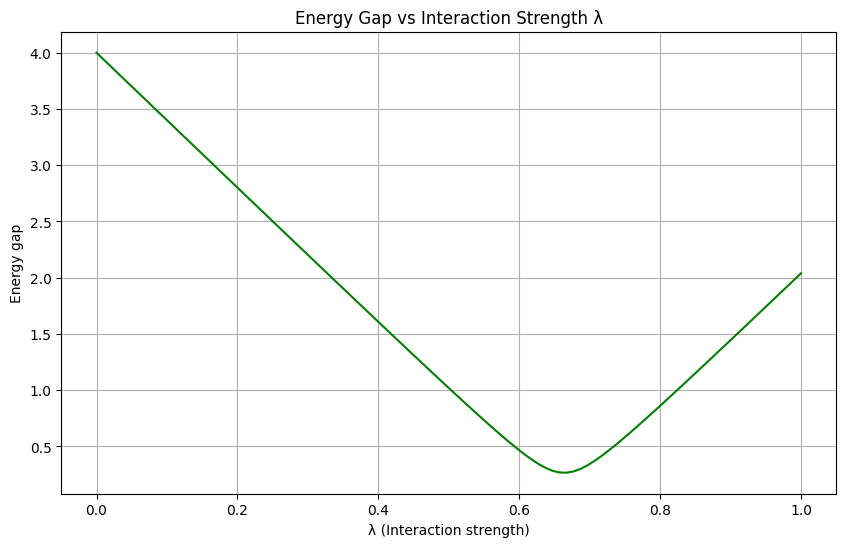

In [18]:
energy_gap = eigenvalues_array[:, 1] - eigenvalues_array[:, 0]

plt.figure(figsize=(10, 6))
plt.plot(lambda_values, energy_gap, 'g-')
plt.xlabel('λ (Interaction strength)')
plt.ylabel('Energy gap')
plt.title('Energy Gap vs Interaction Strength λ')
plt.grid(True)
plt.show()

## Analyze the Eigenstates

Let's analyze how the eigenstates evolve with $\lambda$, by looking at their components in the computational basis:

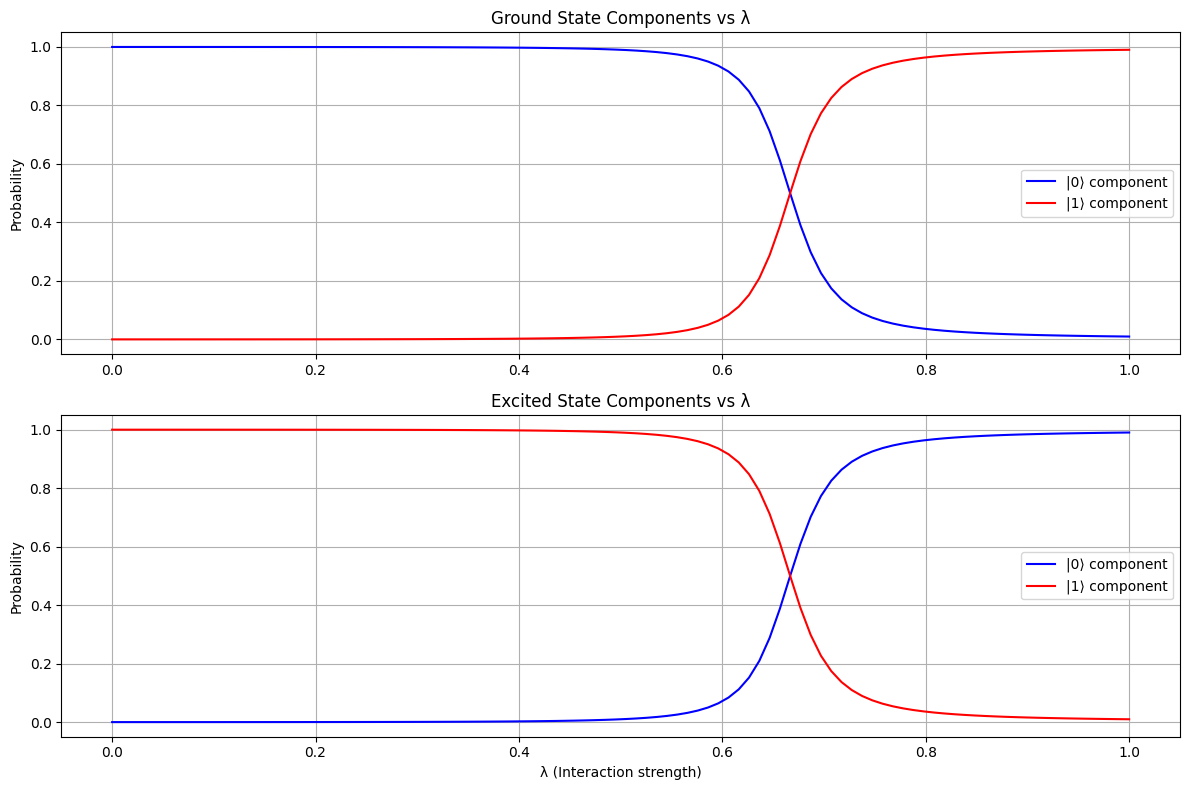

In [5]:
# Extract ground state components
ground_state_0 = np.array([abs(eigenvector[:, 0][0])**2 for eigenvector in eigenvectors_list])
ground_state_1 = np.array([abs(eigenvector[:, 0][1])**2 for eigenvector in eigenvectors_list])

# Extract excited state components
excited_state_0 = np.array([abs(eigenvector[:, 1][0])**2 for eigenvector in eigenvectors_list])
excited_state_1 = np.array([abs(eigenvector[:, 1][1])**2 for eigenvector in eigenvectors_list])


plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(lambda_values, ground_state_0, 'b-', label='|0⟩ component')
plt.plot(lambda_values, ground_state_1, 'r-', label='|1⟩ component')
plt.ylabel('Probability')
plt.title('Ground State Components vs λ')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(lambda_values, excited_state_0, 'b-', label='|0⟩ component')
plt.plot(lambda_values, excited_state_1, 'r-', label='|1⟩ component')
plt.xlabel('λ (Interaction strength)')
plt.ylabel('Probability')
plt.title('Excited State Components vs λ')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

The two above plot shows the probanility of the components of the two eigenstates as a function of $\lambda$.
The first plot shows the probability of the components of the ground state and the second plot shows the probability of the components of the excited state.

Analyzing the first plot for lambda less then $0.6$ the ground state is dominated by the first component around 90\% chance to observe the first component and the second component is small.
As we increase $\lambda$ after $0.6$ the components start to quickly change and the second component becomes larger than the first component at $\lambda\ge2/3$.

For the excited the role is reversed, the first component is small and the second component is dominated with same limit values for $\lambda = 2/3$.

This shows that the eigenstates becomes more mixed as we increase the interaction strength $\lambda$ and the eigenstates are more equally distributed between the two states at $\lambda=2/3$.



## Conclusion

From our analysis, we have made observations about the behavior of the eigenvalues and eigenstates as a function of the interaction strength $\lambda$:

1. **Eigenvalue behavior**: As $\lambda$ increases, we observe how the interaction term $H_I$ affects the energy levels of the system. 
2. **Eigenstate composition**: At $\lambda = 0$, the eigenstates correspond to the computational basis states. As $\lambda$ increases, the eigenstates become superpositions of the computational basis states, demonstrating how the interaction term mixes the states.

3. **Energy gap**: The gap between the ground and excited states may narrow or widen depending on the specific parameters. This gap is important in quantum systems as it relates to the stability of the ground state and the system's response to perturbations.

This simple 2×2 Hamiltonian model demonstrates key concepts that will be important as we move to more complex systems in later parts of this project, particularly when implementing the Variational Quantum Eigensolver (VQE) algorithm.